## Perkenalan

Nama: Sivi Almanaf Ali Shahab

Batch: 006

## Problems

Kamu adalah seorang data scientist di salah satu perusahaan e-commerce. Saat ini, kamu terlibat dalam proyek bersama dengan tim produk dan tim UI/UX untuk merubah tampilan landing page. Menggunakan dataset dari https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/purchase_data.txt?token=AEZDEHRU5YLQEXGDDLCL6CLA2KZTI, menggunakan konsep central of tendency, apakah data cenderung berpusat pada purchased=0 atau purchased=1? dan buatlah analisa menggunakan konsep hypothesis testing dan A/B testing (Informasikan H0 dan H1 pada bagian Mathematical Calculation and Analysis). Apa kesimpulanmu terhadap hasil A/B testing?



**Keterangan Dataset:**

user_id = id pelanggan

timestamp = Waktu ketika pelanggan mengakses laman web

group = grup kontrol dan treatment

landing_page = landing page yang diakses oleh pelanggan (laman lama atau laman baru)

purchased = 0 : tidak ada pembelian, and 1: ada pembelian


## Import Library 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

## Data Loading

In [2]:
df_purchase = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/Dataset/main/purchase_data.txt?token=AEZDEHRU5YLQEXGDDLCL6CLA2KZTI', delimiter=';')

In [3]:
# print top 5 data
df_purchase.head()

,user_id,timestamp,group,landing_page,purchased
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [4]:
df_purchase.shape

(294478, 5)

In [5]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   purchased     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


## Data Processing

Setelah kita cek type data dari masing-masing kolom, ada beberapa data yang masih belum sesuai dengan tipe datanya yang asli. Mari kita rubah dulu ke tipe data yang sesuai sebagai berikut:

In [6]:
df_purchase['user_id'] = df_purchase['user_id'].astype(str)
df_purchase['timestamp'] = pd.to_datetime(df_purchase['timestamp'])

In [7]:
df_purchase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   user_id       294478 non-null  object        
 1   timestamp     294478 non-null  datetime64[ns]
 2   group         294478 non-null  object        
 3   landing_page  294478 non-null  object        
 4   purchased     294478 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 11.2+ MB


In [8]:
df_purchase.head()

,user_id,timestamp,group,landing_page,purchased
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [9]:
df_purchase['timestamp'] = df_purchase['timestamp'].dt.date
df_purchase.head()

,user_id,timestamp,group,landing_page,purchased
0,851104,2017-01-21,control,old_page,0
1,804228,2017-01-12,control,old_page,0
2,661590,2017-01-11,treatment,new_page,0
3,853541,2017-01-08,treatment,new_page,0
4,864975,2017-01-21,control,old_page,1


In [10]:
df = df_purchase.sort_values(by="timestamp")
df.head()

,user_id,timestamp,group,landing_page,purchased
245040,637212,2017-01-02,treatment,new_page,1
27445,924138,2017-01-02,treatment,new_page,0
272484,659091,2017-01-02,control,old_page,0
27450,653194,2017-01-02,treatment,new_page,0
10854,810044,2017-01-02,control,old_page,0


In [11]:
df.set_index('user_id', inplace=True)

In [12]:
df.head()

,timestamp,group,landing_page,purchased
user_id,,,,
637212,2017-01-02,treatment,new_page,1
924138,2017-01-02,treatment,new_page,0
659091,2017-01-02,control,old_page,0
653194,2017-01-02,treatment,new_page,0
810044,2017-01-02,control,old_page,0


In [13]:
df.group.unique()

array(['treatment', 'control'], dtype=object)

## Mathematical Calculation and Analysis

### Measure of Central Tendency

- Mean
- Median
- Mode


Karena tipe data berupa kategorik kita hanya bisa menggunakan 'Mode()' untuk data yang sering muncul

In [14]:
# Mode dari group adalah

print("Modus dari variabel group adalah:", df['group'].mode().sum())

Modus dari variabel group adalah: treatment


In [15]:
print('Jumlah data treatment:', df[df['group']=='treatment']['group'].count())
print('Jumlah data control:', df[df['group']=='control']['group'].count())

Jumlah data treatment: 147276
Jumlah data control: 147202


Data untuk kolom group untuk data treatment jumlahnya sedikit lebih banyak

<AxesSubplot:title={'center':'Variable Treatment dan Kontrol'}>

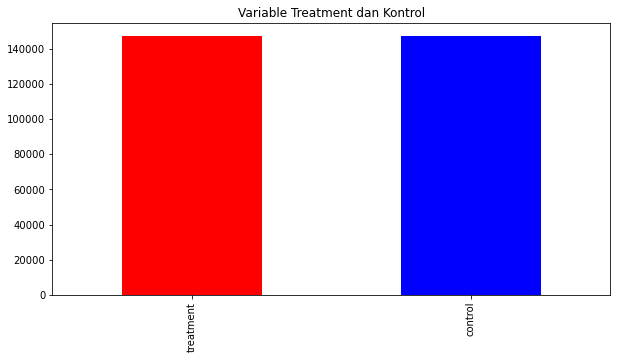

In [16]:
# visualisasi
group = df['group'].value_counts()
group.plot(kind='bar', color=['r', 'b'], figsize=[10, 5], title="Variable Treatment dan Kontrol")

In [17]:
print("Modus dari variabel landing page adalah:", df['landing_page'].mode().sum())

Modus dari variabel landing page adalah: new_pageold_page


In [18]:
print('Jumlah data new page:', df[df['landing_page']=='new_page']['landing_page'].count())
print('Jumlah data old page:', df[df['landing_page']=='old_page']['landing_page'].count())

Jumlah data new page: 147239
Jumlah data old page: 147239


Data untuk kolom landing page adalah data yang jumlahnya seimbang

<AxesSubplot:title={'center':'Variable new page dan old page'}>

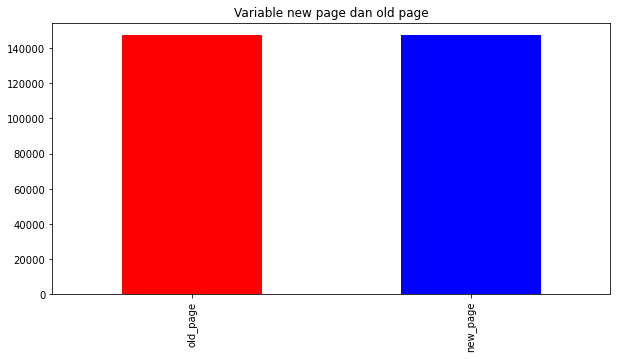

In [19]:
# visualisasi
group = df['landing_page'].value_counts()
group.plot(kind='bar', color=['r', 'b'], figsize=[10, 5], title="Variable new page dan old page")

Kita Bagi Menjadi dua kasus untuk menguji hipotesis, yaitu:

**Kasus I:**

H0: μ_group_treatment = μ_group_control

H1: μ_group_treatment != μ_group_control


**Kasus II:**

**H0: μ_landingpage_newpage =  μ_landingpage_oldpage**

**H1:μ_landingpage_newpage !=  μ_landingpage_oldpage**


## Hasil

#### Kasus I

In [20]:
group_treatment = df[df['group']=='treatment']['purchased']
group_control = df[df['group']=='control']['purchased']


print('Retention rate of group treatment:',group_treatment.sum()/group_treatment.count())
print('Retention rate of group control:',group_control.sum()/group_control.count())

Retention rate of group treatment: 0.11891957956489856
Retention rate of group control: 0.12039917935897611


In [21]:
group_treatment

user_id
637212    1
924138    0
653194    0
645986    0
939054    0
         ..
750363    0
900652    0
694025    0
763379    0
880926    0
Name: purchased, Length: 147276, dtype: int64

In [22]:
group_control

user_id
659091    0
810044    0
638214    0
934736    0
632934    0
         ..
820275    0
918619    0
881686    0
907259    1
820211    0
Name: purchased, Length: 147202, dtype: int64

The retention rate between those group is not different (almost same). Is the difference truly the same or because of chance?

To make sure of our result, we will check using paired test two sided.

Our hypothesis on this case:

**H0: μ_group_treatment = μ_group_control**

**H1:  μ_group_treatment != μ_group_control**

In [23]:
t_stat, p_val = stats.ttest_rel(group_treatment.sample(100000), group_control.sample(100000))
print('P_value: ', p_val)

P_value:  0.02504909473515521


Karena p-value nilainya lebih dari significance level (critical_value) 0.05 kita bisa simpulkan bahwa kita gagal menolak H0 (menerima H0) yang artinya bahwa rata-rata treatment dan control tidak signifikan berbeda. Sehingga dapat disimpulkan bahwa user tetap nyaman dengan menggunakan group treatment maupun kontrol

#### Kasus II

Selanjutnya kita akan uji untuk hipotesis kasus yang kedua

Our hypothesis on this case:

**H0: μ_landingpage_newpage =  μ_landingpage_oldpage**

**H1:μ_landingpage_newpage !=  μ_landingpage_oldpage**

In [24]:
new_page = df[df['landing_page']=='new_page']['purchased']
old_page = df[df['landing_page']=='old_page']['purchased']


print('Retention rate of new page:',new_page.sum()/new_page.count())
print('Retention rate of old page:',old_page.sum()/old_page.count())

Retention rate of new page: 0.11884079625642663
Retention rate of old page: 0.12047759085568362


The retention rate between those group is not different (almost same). Is the difference truly the same or because of chance?

To make sure of our result, we will check using paired test two sided.

Our hypothesis on this case:

**H0: μ_landingpage_newpage =  μ_landingpage_oldpage**

**H1:μ_landingpage_newpage !=  μ_landingpage_oldpage**

In [25]:
t_stat, p_val = stats.ttest_rel(new_page.sample(100000), old_page.sample(100000))
print('P_value: ', p_val)

P_value:  0.1155516971109775


Karena p-value nilainya lebih dari significance level (critical_value) 0.05 kita bisa simpulkan bahwa kita gagal menolak H0 (menerima H0) yang artinya bahwa rata-rata dari new page dan old page tidak signifikan berbeda. maka sangat nyaman dan aman untuk upgrade dengan new page atau tampilan website yang baru

Berdasarkan dari hasil Kasus I dan Kasus II untuk tampilan UI/UX keputusannya adalah dilanjutkan dengan update dengn tampilan yang baru atau versi yang baru karena tidak ada pengaruh yang signifikan terhadap pembelian

#### Chi-Square Test

Kita akan lakukan uji independence antara 2 variabel kategorik menggunakan chi-square antara variabel group dan landing_page

H0: landing page dari UI/UX independent terhadap group

H1: landing page dari UI/UX dependent terhadap group

In [26]:
contingency_table=pd.crosstab(df["group"],df["landing_page"])
contingency_table

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [27]:
stat, p, dof, expected = stats.chi2_contingency(contingency_table)
print('p=%.3f' % (p))
if p > 0.05:
    print('Probably independent')
else:
    print('Probably dependent')

p=0.000
Probably dependent


Karena p_value < 0.05 maka H0 ditolak dan dapat disimpulkan bahwa ada perbedaaan yang signifikan dari landing page terhadap group (perlakuan) yang berbeda